# Conceptual Design: Demo analysis

Exploration of use of Python/Jupyter to analyze and visualize structures discussed in Hervé Capart's _Conceptual Design_ class at NTU Civil Engineering.

### Preliminaries

In [40]:
import os
import numpy as np
import networkx as nx
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4).pprint
from matplotlib import pyplot as plt
# from mpl_toolkits import mplot3d
color_cycle = (plt.rcParams['axes.prop_cycle'].by_key()['color'])
color = lambda i: color_cycle[i % len(color_cycle)]
loop = lambda triangle: triangle + [triangle[0]]

In [41]:
import trimesh as tm
import pyvista as pv

In [42]:
from cdsn.mesh import Mesh
from cdsn.graph import Graph
from cdsn.communities import Communities
from cdsn.geometry import Geometry
from cdsn.utils import e2d
from cdsn.plot import GraphingBase
from cdsn.save import create_directories, export_plots
viz = GraphingBase(font_name="Arial")

# Mesh construction

In [43]:
name = "simpleStructure1"
# name = "standingTower1"

In [44]:
mesh = Mesh(name)
mesh.file_path_name, mesh.trimesh

('../Data/STL/simpleStructure1.stl',
 <trimesh.Trimesh(vertices.shape=(18, 3), faces.shape=(14, 3))>)

In [45]:
graph = Graph(mesh)
graph.nxgraph, graph.n_triangles

(<networkx.classes.graph.Graph at 0x17cf9ba00>, 14)

In [46]:
communities = Communities(graph)
communities.n_communities, #communities.d_community_nodes

(4,)

In [47]:
geometry = Geometry(communities)
geometry.d_appliedforce_communities, geometry.d_keynode_members

({0: 3},
 {2: frozenset({0, 1}),
  4: frozenset({0, 'ground'}),
  7: frozenset({0, 'force'}),
  10: frozenset({1, 'ground'})})

In [48]:
pvmesh = viz.build_mesh(graph, communities, geometry)
plotter = viz.plot_model_3d(pvmesh, backend="trame",)

Widget(value="<iframe src='http://localhost:50175/index.html?ui=P_0x17795bd30_3&reconnect=auto' style='width: …

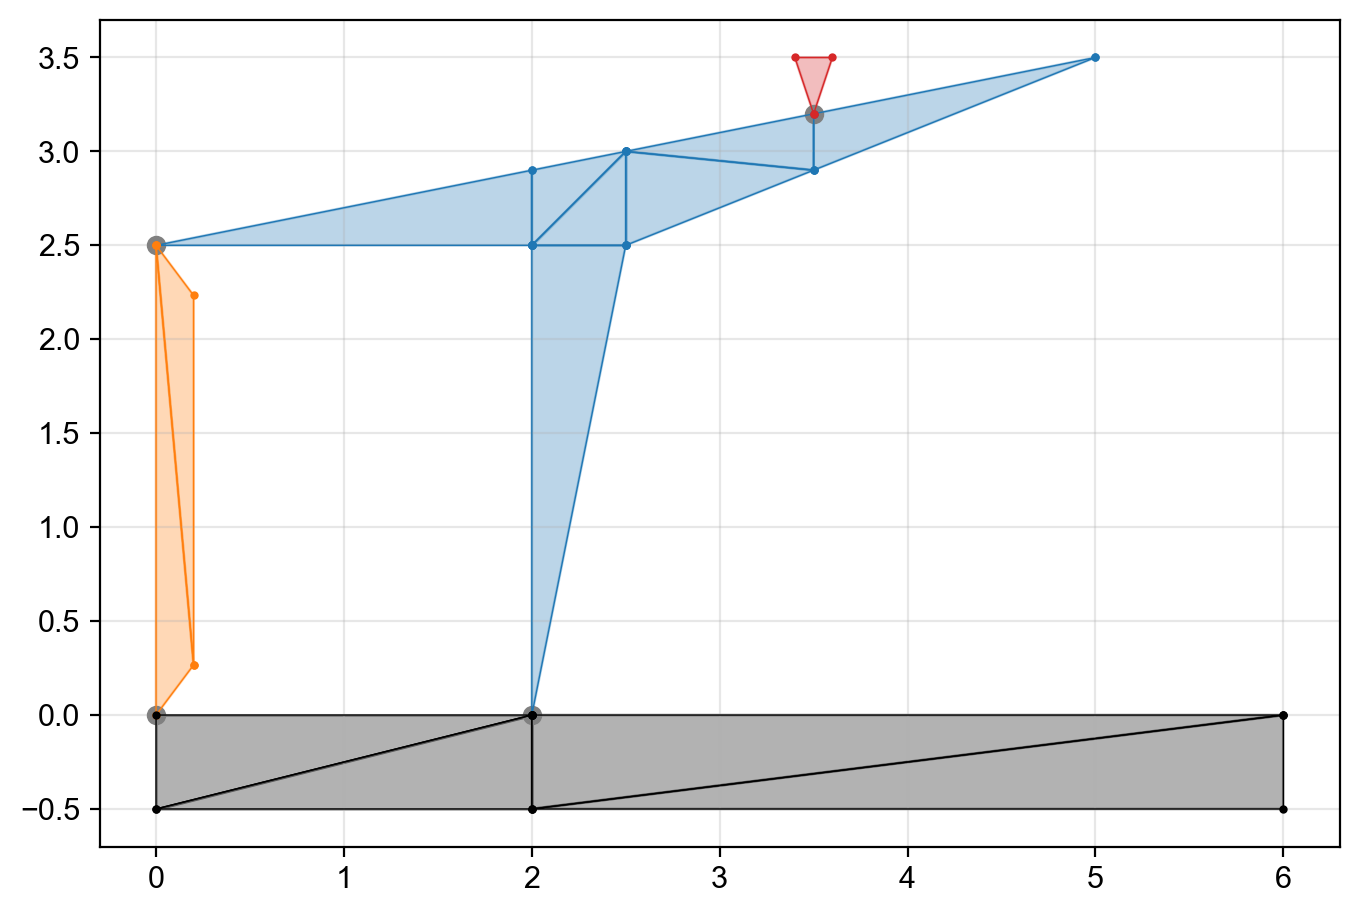

In [49]:
viz.plot_model(name, graph, communities, geometry)

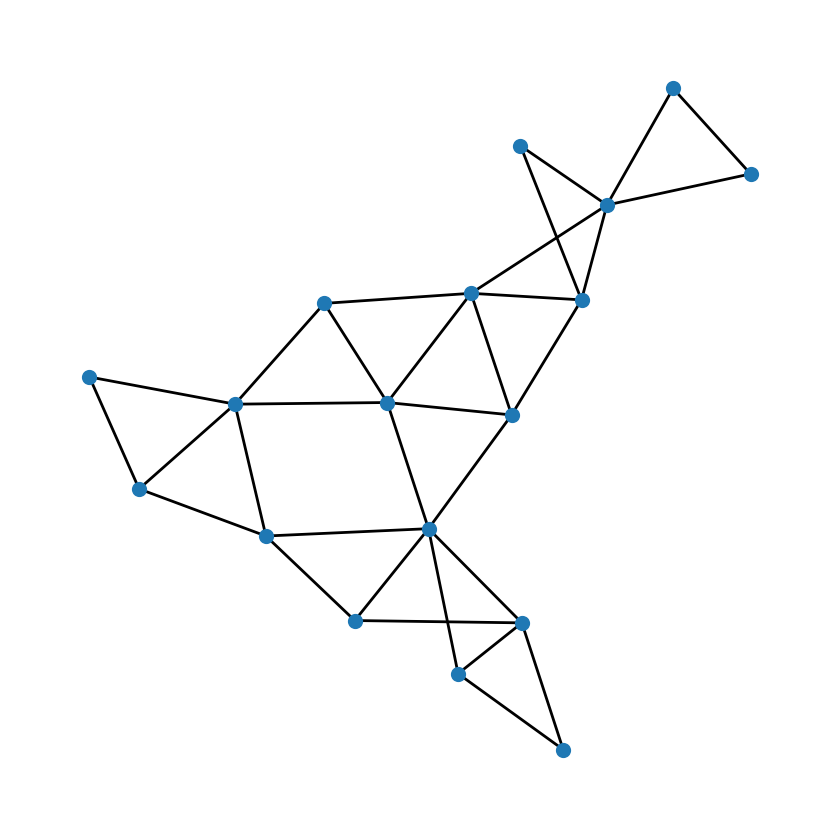

In [50]:
fig = viz.create_figure(fig_name=f"{name}_graph", fig_size=(4,4,),)
nx.draw_kamada_kawai(graph.nxgraph, node_size=20,)

# Export

In [51]:
plots_dirname = "Plots"
plots_path = create_directories(("..",), plots_dirname)
for gr_ in [viz]:    
    export_plots( gr_.fdict, plots_path, file_types=["jpg"], dpi=100 )

In [52]:
plotter.export_html(os.path.join(plots_path, f"{name}.html"))